In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

liste = [1800, 1500, 2200, 3000, 2172, 5000, 1400, 1200, 1100, 1300]

revenus = np.array(liste)

revenus

array([1800, 1500, 2200, 3000, 2172, 5000, 1400, 1200, 1100, 1300])

In [2]:
haut_revenus = revenus[revenus > 3000]

haut_revenus

array([5000])

In [8]:
somme = revenus.sum() * 12
somme

248064

In [9]:
moyenne = somme // 10

moyenne

24806

In [10]:
revenus[revenus == 1400] += 200

revenus

array([1800, 1500, 2200, 3000, 2172, 5000, 1600, 1200, 1100, 1300])

In [23]:
prets = pd.read_csv("../data/prets.csv")

# calcul du taux d'endettement
prets['taux_endettement'] = round(prets['remboursement'] * 100 / prets['revenu'], 2)

# renommer taux en taux_interet
prets.rename(columns={'taux':'taux_interet'}, inplace=True)

# calculer le cout total du pret
prets['cout_total'] = prets['remboursement'] * prets['duree']

# calculer les bénéfices mensuels réalisés
prets['benefices'] = round((prets['cout_total'] * prets['taux_interet']/100)/(24), 2)

prets.head()

,identifiant,ville,CP,revenu,remboursement,duree,type,taux_interet,taux_endettement,cout_total,benefices
0,0,TOULOUSE,31100,3669.0,1130.05,240,immobilier,1.168,30.80,271212.0,131.99
1,1,PARIS,75009,5310.0,240.00,64,automobile,3.701,4.52,15360.0,23.69
2,1,PARIS,75009,5310.0,1247.85,300,immobilier,1.173,23.50,374355.0,182.97
3,2,MARSEILLE,13010,1873.0,552.54,240,immobilier,0.972,29.50,132609.6,53.71
4,3,MARSEILLE,13010,1684.0,586.03,180,immobilier,1.014,34.80,105485.4,44.57


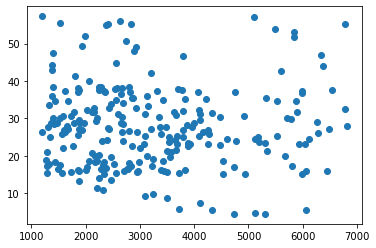

In [24]:
plt.scatter(prets['revenu'] , prets['taux_endettement'])

In [26]:
groupe = prets.groupby('ville')['revenu'].sum()

groupe

ville
BORDEAUX      50816.0
LYON          95354.0
MARSEILLE    145926.0
NICE          85288.0
PARIS        335459.0
TOULOUSE      75617.0
Name: revenu, dtype: float64